In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
plt.style.use('tableau-colorblind10')
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 
         'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

In [2]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler, LabelEncoder

C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [3]:
df_train = pd.read_csv('cleaned_data.csv')

In [4]:
df_train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,age_now,year_since_graduated
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,Y,1,level_0,...,2,3,2,3,0,46.37,0.0,0,36,10
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,Y,0,level_1,...,4,3,0,0,1,47.68,0.0,0,32,14
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,Y,1,level_1,...,10,9,6,2,1,40.73,0.0,0,51,32
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,Y,2,level_1,...,11,6,0,4,10,47.42,0.0,0,54,34
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,Y,3,level_1,...,9,8,2,3,0,47.18,0.0,0,56,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11147,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,Y,1,level_5,...,3,3,0,4,1,50.87,0.0,0,35,5
11148,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,Y,2,level_5,...,1,2,0,6,0,79.91,0.0,0,33,6
11149,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,Y,0,level_5,...,1,2,0,4,0,78.38,0.0,0,30,4
11150,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,Y,1,level_5,...,5,4,0,4,1,85.94,1.0,0,34,9


## Checking Proportion Y lable

In [5]:
df_train['Best Performance'].value_counts()

0    9754
1    1398
Name: Best Performance, dtype: int64

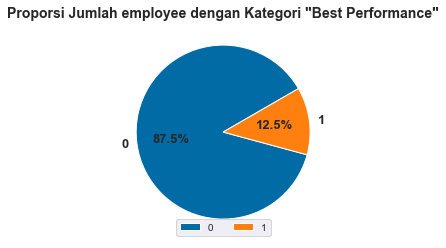

In [6]:
plt.figure(figsize=(4,4))
plt.title('Proporsi Jumlah employee dengan Kategori "Best Performance"', fontsize=14, fontweight='bold')
plt.pie(df_train['Best Performance'].value_counts(), 
       autopct='%.1f%%', labels=df_train['Best Performance'].value_counts().index, 
       textprops={'fontsize':13,'fontweight':'bold'}, startangle=30)
plt.legend(loc='lower center', ncol=3)
plt.show()

## Label encoder

In [7]:
# le=LabelEncoder()

In [8]:
df_train1 = df_train.copy()

**`job_level`**

In [9]:
df_train1['job_level'] = df_train1['job_level'].map({'JG03':1, 'JG04':2, 'JG05':3})

**`person_level`**

In [10]:
df_train1['person_level'] = df_train1['person_level'].map({'PG01':1,'PG02':2,'PG03':3, 'PG04':4, 
                                                          'PG05':5,'PG06':6,'PG07':7, 'PG08':8})

**`Education_level`**

In [11]:
df_train1['Education_level'] = df_train1['Education_level'].map({'level_0':1,'level_1':2,'level_2':3, 
                                                              'level_3':4, 'level_4':5, 'level_5':6})

**`Employee_type`**

In [12]:
# df_train1['Employee_type'] = df_train1['Employee_type'].map({'RM_type_A':3, 'RM_type_B':2, 'RM_type_C':1})

## Dummy

In [13]:
gender = pd.get_dummies(df_train1['gender'])
marital = pd.get_dummies(df_train1['marital_status_maried(Y/N)'])
emp_type = pd.get_dummies(df_train1['Employee_type'])
dummy1 = pd.concat([gender,marital,emp_type], axis=1)
dummy1

,1,2,N,Y,RM_type_A,RM_type_B,RM_type_C
0,0,1,0,1,1,0,0
1,0,1,0,1,1,0,0
2,1,0,0,1,0,0,1
3,0,1,0,1,1,0,0
4,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...
11147,0,1,0,1,1,0,0
11148,1,0,0,1,0,1,0
11149,0,1,0,1,0,1,0
11150,1,0,0,1,1,0,0


In [14]:
df_temp = df_train1.drop(['gender','marital_status_maried(Y/N)', 'Employee_type', 'Best Performance'], axis=1)

In [15]:
df_temp.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,number_of_dependences,Education_level,GPA,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,age_now,year_since_graduated
0,2,1.352775,3,1.352775,1.732051,1,1,2.86,4,2,3,2,3,0,46.37,0.0,36,10
1,2,1.292285,3,1.292285,1.039230,0,2,3.14,4,4,3,0,0,1,47.68,0.0,32,14
2,3,2.565151,6,2.308679,1.780449,1,2,3.11,28,10,9,6,2,1,40.73,0.0,51,32
3,3,2.828427,6,1.000000,1.385641,2,2,3.11,29,11,6,0,4,10,47.42,0.0,54,34
4,3,2.828427,6,2.828427,0.707107,3,2,3.11,30,9,8,2,3,0,47.18,0.0,56,36


In [16]:
df_temp.shape

(11152, 18)

## Concatinate `df_temp` and `dummy`

In [17]:
data1 = pd.concat([df_temp,dummy1,df_train1['Best Performance']],axis=1)
data1

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,number_of_dependences,Education_level,GPA,job_duration_from_training,branch_rotation,...,age_now,year_since_graduated,1,2,N,Y,RM_type_A,RM_type_B,RM_type_C,Best Performance
0,2,1.352775,3,1.352775,1.732051,1,1,2.86,4,2,...,36,10,0,1,0,1,1,0,0,0
1,2,1.292285,3,1.292285,1.039230,0,2,3.14,4,4,...,32,14,0,1,0,1,1,0,0,0
2,3,2.565151,6,2.308679,1.780449,1,2,3.11,28,10,...,51,32,1,0,0,1,0,0,1,0
3,3,2.828427,6,1.000000,1.385641,2,2,3.11,29,11,...,54,34,0,1,0,1,1,0,0,0
4,3,2.828427,6,2.828427,0.707107,3,2,3.11,30,9,...,56,36,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11147,2,1.256981,3,1.256981,1.224745,1,6,3.33,4,3,...,35,5,0,1,0,1,1,0,0,0
11148,2,1.385641,3,1.385641,1.802776,2,6,3.00,3,1,...,33,6,1,0,0,1,0,1,0,0
11149,2,1.256981,3,1.256981,1.385641,0,6,3.48,2,1,...,30,4,0,1,0,1,0,1,0,0
11150,2,1.118034,3,1.118034,0.000000,1,6,3.53,5,5,...,34,9,1,0,0,1,1,0,0,0


In [18]:
data1['Best Performance'].value_counts()

0    9754
1    1398
Name: Best Performance, dtype: int64

## Checking data again

In [19]:
data1.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
number_of_dependences                    0
Education_level                          0
GPA                                      0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       0
Achievement_above_100%_during3quartal    0
age_now                                  0
year_since_graduated                     0
1                                        0
2                                        0
N                                        0
Y                                        0
RM_type_A                                0
RM_type_B  

## Checking imbalanced data

In [20]:
data1['Best Performance'].value_counts()

0    9754
1    1398
Name: Best Performance, dtype: int64

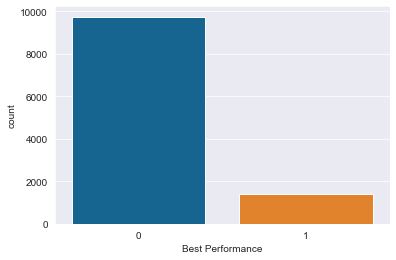

In [21]:
sns.countplot(data1['Best Performance'])

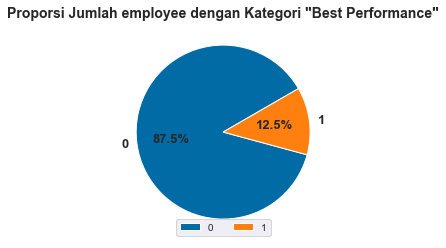

In [22]:
plt.figure(figsize=(4,4))
plt.title('Proporsi Jumlah employee dengan Kategori "Best Performance"', fontsize=14, fontweight='bold')
plt.pie(data1['Best Performance'].value_counts(), 
       autopct='%.1f%%', labels=data1['Best Performance'].value_counts().index, 
       textprops={'fontsize':13,'fontweight':'bold'}, startangle=30)
plt.legend(loc='lower center', ncol=3)
plt.show()

## Oversampling Dataset

In [23]:
X = data1.drop('Best Performance', axis=1)
y = data1['Best Performance']

In [24]:
print(f'X shape : {X.shape}')
print(f'y shape : {y.shape}')

X shape : (11152, 25)
y shape : (11152,)


In [25]:
y.value_counts()

0    9754
1    1398
Name: Best Performance, dtype: int64

In [26]:
smot = SMOTE()
X_os, y_os = smot.fit_resample(X,y)

In [27]:
print(f'X Over Sampling shape : {X_os.shape}')
print(f'y Over Sampling shape : {y_os.shape}')

X Over Sampling shape : (19508, 25)
y Over Sampling shape : (19508,)


## Split Dataset

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X_os, y_os, test_size=0.25, random_state=42)

In [29]:
print(X_train.shape)
print(y_train.shape)

(14631, 25)
(14631,)


In [30]:
print(X_test.shape)
print(y_test.shape)

(4877, 25)
(4877,)


In [31]:
y_test.value_counts()

1    2447
0    2430
Name: Best Performance, dtype: int64

## Modelling

### Logistic Regression

In [32]:
logreg = LogisticRegression(solver='newton-cg')

In [33]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
pred_logreg = logreg.predict(X_test)
pred_logreg

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [35]:
proba_logreg = logreg.predict_proba(X_test)
proba_logreg

array([[0.07993808, 0.92006192],
       [0.97997248, 0.02002752],
       [0.53273844, 0.46726156],
       ...,
       [0.99481774, 0.00518226],
       [0.98255248, 0.01744752],
       [0.47745159, 0.52254841]])

In [36]:
logreg.coef_

array([[-3.03892412e-01, -1.09137655e-01, -4.46960323e-01,
        -2.29620283e-01, -5.42722757e-02, -1.50984100e-01,
        -2.97457979e-01, -1.57948611e-01,  1.50640865e-01,
        -4.30262937e-02, -2.29032520e-03,  2.80134249e-03,
        -4.75751888e-02, -5.50991653e-02,  4.67811071e-02,
         1.52776242e+00, -5.70904260e-02, -8.34255582e-03,
        -5.00025729e+00, -4.39036461e+00, -4.19470694e+00,
        -3.55251187e+00, -4.08766959e+00, -4.79841624e+00,
        -4.66261669e+00]])

In [37]:
coef_logreg = pd.DataFrame(logreg.coef_[0], index=X_train.columns, columns=['Coef']).sort_values('Coef',ascending=False)
coef_logreg

,Coef
Achievement_above_100%_during3quartal,1.527762
job_duration_from_training,0.150641
Last_achievement_%,0.046781
assign_of_otherposition,0.002801
job_rotation,-0.002290
year_since_graduated,-0.008343
branch_rotation,-0.043026
annual leave,-0.047575
job_duration_in_current_branch,-0.054272
sick_leaves,-0.055099


In [38]:
print(confusion_matrix(y_test,pred_logreg))

[[2212  218]
 [ 124 2323]]


<Figure size 432x432 with 0 Axes>

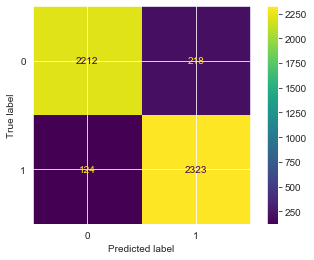

In [39]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(logreg,X_test,y_test, values_format='d')
plt.show()

In [40]:
print(classification_report(y_test,pred_logreg))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2430
           1       0.91      0.95      0.93      2447

    accuracy                           0.93      4877
   macro avg       0.93      0.93      0.93      4877
weighted avg       0.93      0.93      0.93      4877



In [41]:
cv_score = cross_val_score(logreg,X_test,y_test, cv=10, scoring='accuracy')

In [42]:
cv_score

array([0.92418033, 0.91188525, 0.92418033, 0.94057377, 0.94672131,
       0.92827869, 0.92827869, 0.9301848 , 0.92402464, 0.92607803])

In [43]:
cv_score.mean()

0.9284385834988387

In [44]:
proba_best = proba_logreg[:,1]
fpr, tpr, threshold = roc_curve(y_test, proba_best)
roc_auc_logreg = auc(fpr,tpr)

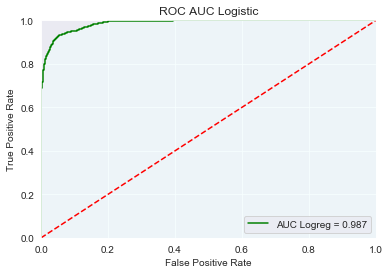

In [45]:
plt.title('ROC AUC Logistic')
plt.plot(fpr, tpr, 'green', label='AUC Logreg = {}'.format(round(roc_auc_logreg,3)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr,tpr, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

### Random Forest

In [46]:
rfc = RandomForestClassifier()

In [47]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
pred_rfc = rfc.predict(X_test)
pred_rfc

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [49]:
proba_rfc = rfc.predict_proba(X_test)
proba_rfc

array([[0.  , 1.  ],
       [1.  , 0.  ],
       [0.83, 0.17],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.03, 0.97]])

In [50]:
print(confusion_matrix(y_test,pred_rfc))

[[2399   31]
 [  62 2385]]


<Figure size 432x432 with 0 Axes>

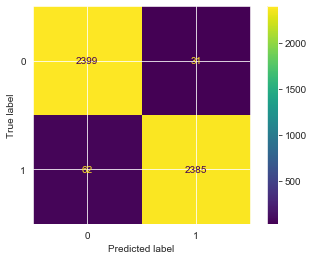

In [51]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(rfc,X_test,y_test, values_format='d')
plt.show()

In [52]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2430
           1       0.99      0.97      0.98      2447

    accuracy                           0.98      4877
   macro avg       0.98      0.98      0.98      4877
weighted avg       0.98      0.98      0.98      4877



In [53]:
cv_score_rfc = cross_val_score(rfc,X_test,y_test, cv=10, scoring='accuracy')

In [54]:
cv_score_rfc

array([0.95696721, 0.95696721, 0.96721311, 0.98565574, 0.97336066,
       0.97131148, 0.97745902, 0.96714579, 0.96714579, 0.97330595])

In [55]:
cv_score_rfc.mean()

0.9696531962163799

In [56]:
proba_best_rfc = proba_rfc[:,1]
fpr_rfc, tpr_rfc, threshold_rfc = roc_curve(y_test, proba_best_rfc)
roc_auc_rfc = auc(fpr_rfc,tpr_rfc)

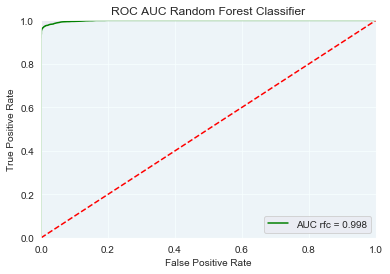

In [57]:
plt.title('ROC AUC Random Forest Classifier')
plt.plot(fpr_rfc, tpr_rfc, 'green', label='AUC rfc = {}'.format(round(roc_auc_rfc,3)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfc,tpr_rfc, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

In [58]:
rfc_feat_imp = rfc.feature_importances_
df_rfc_feat_imp = pd.DataFrame(rfc_feat_imp, index=X_train.columns)
df_rfc_feat_imp = df_rfc_feat_imp.reset_index().rename(columns={'index':'feature',0:'importance'})
df_rfc_feat_imp = df_rfc_feat_imp.sort_values('importance', ascending=False)
df_rfc_feat_imp

,feature,importance
15,Achievement_above_100%_during3quartal,0.473286
14,Last_achievement_%,0.277086
4,job_duration_in_current_branch,0.035066
23,RM_type_B,0.023646
1,job_duration_in_current_job_level,0.023508
3,job_duration_in_current_person_level,0.019870
7,GPA,0.016975
8,job_duration_from_training,0.015072
19,2,0.011740
18,1,0.011404


### DATA TEST

In [59]:
test = pd.read_csv('test.csv')

In [60]:
df_test = test.copy()

In [61]:
df_test['job_level'].unique()

array(['JG04', 'JG05', 'JG03', 'JG06'], dtype=object)

**Fixing `GPA`, `age`, `year_graduated`**

In [62]:
def fixing_gpa(x):
    jg = x[0]
    gpa = x[1]
    
    if gpa > 4.00 or gpa < 0.50:
        if jg == 'JG03':
            return 3.08
        elif jg == 'JG04':
            return 3.14
        elif jg == 'JG05':
            return 3.11
    else:
        return gpa

In [63]:
df_test['GPA'] = df_test[['job_level','GPA']].apply(fixing_gpa,axis=1)

df_test['age_now'] = 2021-df_test['age']

df_test['year_since_graduated'] = 2021-df_test['year_graduated']

In [64]:
df_test.drop(['age', 'year_graduated'],axis=1, inplace=True)

**`label encoder`**

In [65]:
df_test['Education_level'].unique()

array(['level_3', 'level_4', 'level_1', 'level_5', 'level_0', 'level_2'],
      dtype=object)

In [66]:
df_test['job_level'] = df_test['job_level'].map({'JG03':1,'JG04':2,'JG05':3,'JG06':4})

df_test['person_level'] = df_test['person_level'].map({'PG01':1,'PG02':2,'PG03':3, 'PG04':4, 
                                                          'PG05':5,'PG06':6,'PG07':7, 'PG08':8})

df_test['Education_level'] = df_test['Education_level'].map({'level_0':1,'level_1':2,'level_2':3, 
                                                              'level_3':4, 'level_4':5, 'level_5':6})

# df_test['Employee_type'] = df_test['Employee_type'].map({'RM_type_A':3, 'RM_type_B':2, 'RM_type_C':1})

In [67]:
df_test.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,marital_status_maried(Y/N),number_of_dependences,Education_level,...,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,age_now,year_since_graduated
0,2,1.256981,3,1.256981,0.707107,RM_type_A,1,N,0,4,...,6,4,2,6,3,7,84.02,0.0,33,12
1,2,1.224745,3,1.224745,1.256981,RM_type_B,2,N,0,5,...,2,2,2,0,1,0,63.74,0.0,30,7
2,2,0.500000,3,0.500000,1.081665,RM_type_A,2,Y,1,5,...,4,2,2,0,2,1,88.19,1.0,32,10
3,2,1.256981,3,1.256981,1.802776,RM_type_A,2,Y,1,5,...,3,1,3,0,3,0,25.94,0.0,31,7
4,2,1.352775,3,1.352775,1.224745,RM_type_B,1,Y,0,5,...,5,3,2,0,3,0,82.32,0.0,36,14


In [68]:
df_test['job_level'].unique()

array([2, 3, 1, 4], dtype=int64)

**`Dummy`**

In [69]:
gender = pd.get_dummies(df_test['gender'])
marital = pd.get_dummies(df_test['marital_status_maried(Y/N)'])
emp_type = pd.get_dummies(df_test['Employee_type'])

In [70]:
dummy_test = pd.concat([gender,marital,emp_type], axis=1)
dummy_test

,1,2,N,Y,RM_type_A,RM_type_B,RM_type_C
0,1,0,1,0,1,0,0
1,0,1,1,0,0,1,0
2,0,1,0,1,1,0,0
3,0,1,0,1,1,0,0
4,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...
5995,0,1,0,1,0,1,0
5996,0,1,0,1,1,0,0
5997,0,1,0,1,1,0,0
5998,0,1,0,1,1,0,0


In [71]:
df_temp = df_test.drop(['gender','marital_status_maried(Y/N)', 'Employee_type'], axis=1)

In [72]:
df_temp.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,number_of_dependences,Education_level,GPA,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,age_now,year_since_graduated
0,2,1.256981,3,1.256981,0.707107,0,4,3.08,6,4,2,6,3,7,84.02,0.0,33,12
1,2,1.224745,3,1.224745,1.256981,0,5,3.31,2,2,2,0,1,0,63.74,0.0,30,7
2,2,0.500000,3,0.500000,1.081665,1,5,3.44,4,2,2,0,2,1,88.19,1.0,32,10
3,2,1.256981,3,1.256981,1.802776,1,5,3.14,3,1,3,0,3,0,25.94,0.0,31,7
4,2,1.352775,3,1.352775,1.224745,0,5,3.34,5,3,2,0,3,0,82.32,0.0,36,14


In [73]:
df_temp.shape

(6000, 18)

## Concatinate `df` and `dummy`

In [74]:
data_test = pd.concat([df_temp,dummy_test],axis=1)
data_test

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,number_of_dependences,Education_level,GPA,job_duration_from_training,branch_rotation,...,Achievement_above_100%_during3quartal,age_now,year_since_graduated,1,2,N,Y,RM_type_A,RM_type_B,RM_type_C
0,2,1.256981,3,1.256981,0.707107,0,4,3.08,6,4,...,0.0,33,12,1,0,1,0,1,0,0
1,2,1.224745,3,1.224745,1.256981,0,5,3.31,2,2,...,0.0,30,7,0,1,1,0,0,1,0
2,2,0.500000,3,0.500000,1.081665,1,5,3.44,4,2,...,1.0,32,10,0,1,0,1,1,0,0
3,2,1.256981,3,1.256981,1.802776,1,5,3.14,3,1,...,0.0,31,7,0,1,0,1,1,0,0
4,2,1.352775,3,1.352775,1.224745,0,5,3.34,5,3,...,0.0,36,14,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2,1.292285,3,1.292285,0.707107,0,5,3.01,2,2,...,0.0,33,6,0,1,0,1,0,1,0
5996,2,1.352775,3,1.352775,1.581139,1,5,3.56,5,3,...,3.0,32,10,0,1,0,1,1,0,0
5997,2,1.385641,3,1.385641,1.224745,0,5,3.59,3,2,...,0.0,30,8,0,1,0,1,1,0,0
5998,3,1.385641,5,1.385641,0.648074,2,5,2.93,14,7,...,0.0,41,18,0,1,0,1,1,0,0


In [75]:
data_test.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
number_of_dependences                    0
Education_level                          0
GPA                                      0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       0
Achievement_above_100%_during3quartal    0
age_now                                  0
year_since_graduated                     0
1                                        0
2                                        0
N                                        0
Y                                        0
RM_type_A                                0
RM_type_B  

In [76]:
print(list(X_train.columns))

['job_level', 'job_duration_in_current_job_level', 'person_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'number_of_dependences', 'Education_level', 'GPA', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual leave', 'sick_leaves', 'Last_achievement_%', 'Achievement_above_100%_during3quartal', 'age_now', 'year_since_graduated', 1, 2, 'N', 'Y', 'RM_type_A', 'RM_type_B', 'RM_type_C']


In [77]:
print(list(data_test.columns))

['job_level', 'job_duration_in_current_job_level', 'person_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'number_of_dependences', 'Education_level', 'GPA', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual leave', 'sick_leaves', 'Last_achievement_%', 'Achievement_above_100%_during3quartal', 'age_now', 'year_since_graduated', 1, 2, 'N', 'Y', 'RM_type_A', 'RM_type_B', 'RM_type_C']


**Logistic Regression**

In [78]:
pred_res_logreg = logreg.predict(data_test)
pred_res_logreg

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
pred_res_logreg.sum()

1100

In [80]:
proba_res_logreg = logreg.predict_proba(data_test)
proba_res_logreg

array([[9.81937898e-01, 1.80621017e-02],
       [9.94714488e-01, 5.28551179e-03],
       [7.44611146e-01, 2.55388854e-01],
       ...,
       [9.99020886e-01, 9.79113876e-04],
       [9.74441807e-01, 2.55581925e-02],
       [9.73009957e-01, 2.69900433e-02]])

In [81]:
final_res_logreg = proba_res_logreg[:,1]
df_result_logreg = pd.DataFrame(final_res_logreg, columns=['Best Performance'])
df_result_logreg.reset_index(inplace=True)

In [82]:
df_result_logreg

,index,Best Performance
0,0,0.018062
1,1,0.005286
2,2,0.255389
3,3,0.003084
4,4,0.011323
...,...,...
5995,5995,0.006138
5996,5996,0.869876
5997,5997,0.000979
5998,5998,0.025558


In [83]:
# df_result_logreg.to_csv('Submission-Another_model_Logistic.csv', index=False)

**Random Forest Classifier**

In [84]:
pred_res_rfc = rfc.predict(data_test)
pred_res_rfc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
pred_res_rfc.sum()

627

In [86]:
proba_res_rfc = rfc.predict_proba(data_test)
proba_res_rfc

array([[0.99, 0.01],
       [0.99, 0.01],
       [0.56, 0.44],
       ...,
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ]])

In [87]:
final_res_rfc = proba_res_rfc[:,1]
df_result_rfc = pd.DataFrame(final_res_rfc, columns=['Best Performance'])
df_result_rfc.reset_index(inplace=True)

In [88]:
df_result_rfc

,index,Best Performance
0,0,0.01
1,1,0.01
2,2,0.44
3,3,0.00
4,4,0.00
...,...,...
5995,5995,0.00
5996,5996,0.31
5997,5997,0.00
5998,5998,0.01


In [89]:
# df_result_rfc.to_csv('Submission-Another_model_RFC.csv', index=False)